# Problema 5

En este ejercicio se quiere ver como se comporta la magnitud absoluta en la banda r en función del redshift para las galaxias de la muestra.
    
La magnitud absoluta para cada galaxia se puede calcular usando la aproximación:

$$M = m - 25 - 5.log_{10}(\frac{c.z}{H})$$ Ec (1)

donde r es la magnitud aparente, c=300000 km/s es la velocidad de la luz y H=75 (km/s)/Mpc la constante de Hubble. En este ejercicio se pide considerar los valores $m_r < 17.5$, por lo tanto se tiene m=r y M=$M_r$.

Se comienza importando los datos necesario de la tabla de datos: la magnitud aparente r y el resdhift de cada galaxia.

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
#import random
import seaborn as sns

In [2]:
sns.set()

In [3]:
#defino la petroMag_r (columna 5) 
r = np.genfromtxt('Tabla2_g3.csv', delimiter=',', usecols=5) 

#defino el redshift (columna 6)
z = np.genfromtxt('Tabla2_g3.csv', delimiter=',', usecols=6) 

In [5]:
#calculo magnitud absoluta para cada galaxia

c=300000 #km/s
H=75 #km/s /Mpc
z2=[]
Mr=[]
for i in range(len(z)):
    if (-9999 != r[i]) and (r[i] < 17.5):  #hay valores de Mr que dan -9999 que no los considero y pido mr<17.5
        M = r[i] - 25 - 5 * log10((c * z[i]) / H) 
        z2.append(z[i])
        Mr.append(M)
    else:
        None
    

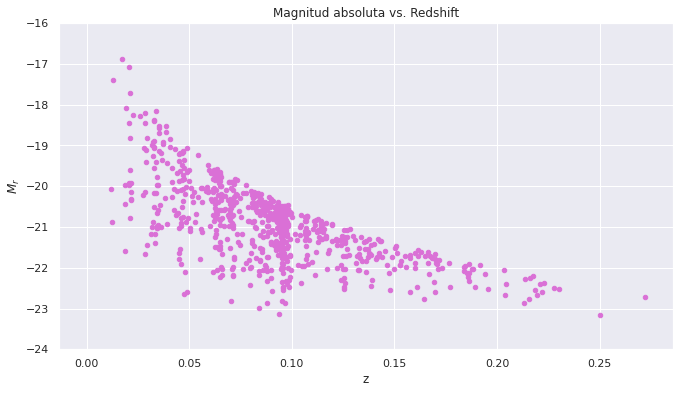

In [6]:
#grafico para ver la forma
plt.figure(figsize=(11,6))
plt.scatter(z2, Mr, s=20, color='orchid')

plt.ylim(-24,-16)
plt.title('Magnitud absoluta vs. Redshift')
plt.xlabel('z')
plt.ylabel('$M_r$')
plt.show()

Se quiere ajustar los puntos del borde, aquellos que envuelven el resto de puntos. Para ello se realiza un programa para identificarlos.

Se comienza dividiendo al resdshinf en n bines y para cada uno de ellos se calcula el valor máximo de la magnitud absoluta en ese intervalo. Luego se grafica ese $M_r$ máximo del intervalo con el valor extremo izquierdo del bin. 

In [8]:
n=50
bin_z=np.linspace(min(z2), max(z2), n)

In [9]:
Mr_max=[]                      #lista que va a guardar las Mr máximas
z3=[]
for i in range(len(bin_z)-1):  #recorro los bines, pongo -1 por que sino cuando sume hasta i+1 se rompe
    lista_i=[]                 #lista para cada i=bin
    for j in range(len(z2)):   #recorro el z2
        if (bin_z[i] <= z2[j]) and (z2[j] < bin_z[i+1]): #condicion para que esté adentro del bin
            lista_i.append(Mr[j])  #lo agrego a una lista
    #print(len(lista_i))
    if (len(lista_i) != 0):        #le indico que no considere estos valores sino no le gusta
        x=max(lista_i)             #busco el máximo para cada bin
        Mr_max.append(x)
        z3.append(bin_z[i])

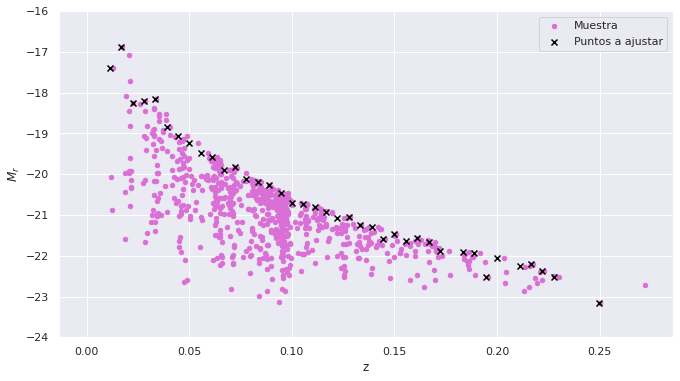

In [10]:
#grafico los valores a ajustar

plt.figure(figsize=(11,6))

plt.scatter(z2, Mr, s=20, color='orchid', label='Muestra')
plt.scatter(z3, Mr_max, marker='x', color='black', label='Puntos a ajustar')

plt.ylim(-24,-16)
plt.xlabel('z')
plt.ylabel('$M_r$')
plt.legend(loc='best')
plt.show()

Se puede ver que los puntos a ajustar dependen del número de bineado 'n' elegido para el redshift: si son pocos puntos puese ser que no sean suficientes para realizar el ajuste, mientras que si son muchos se introduce mucho ruido en los mismos. Se toma n=50.

Se propone para ajustar la envolvente de puntos la Ec (1), donde m (magnitud aparente) es el parámentro a ajustar. 

In [11]:
#defino funcion de ajuste
def func(m):
    lista=[]
    for i in range(len(z3)):
        lista.append(m-25- 5 * log10((c * z3[i]) / H))
    return lista
    

Se le dan distintos valores de m para ver cual es la mejor curva de ajuste:

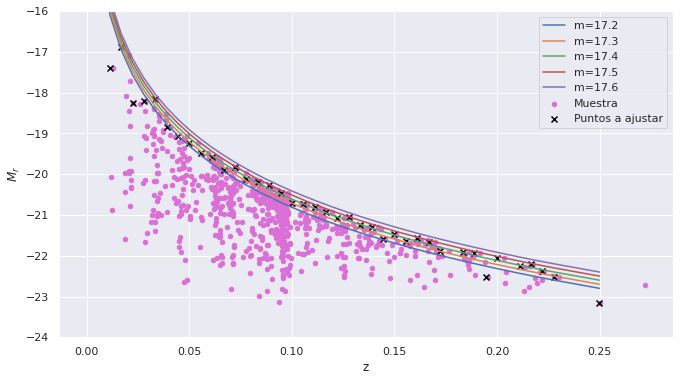

In [12]:
plt.figure(figsize=(11,6))

plt.scatter(z2, Mr, s=20, color='orchid', label='Muestra')
plt.scatter(z3, Mr_max, marker='x', color='black', label='Puntos a ajustar')
plt.plot(z3, func(m=17.2), label='m=17.2')
plt.plot(z3, func(m=17.3), label='m=17.3')
plt.plot(z3, func(m=17.4), label='m=17.4')
plt.plot(z3, func(m=17.5), label='m=17.5')
plt.plot(z3, func(m=17.6), label='m=17.6')

plt.ylim(-24,-16)
plt.xlabel('z')
plt.ylabel('$M_r$')
plt.legend(loc='best')
plt.show()

Al variar m, la función de ajuste sube y baja en el eje de $M_r$. Para ver cual es la que mejor ajusta a los puntos, se calcula para cada m el valor de $\chi^2$ entre los valores de func(i,m) con Mr_max(i) para cada i en z3.

In [13]:
#funcion chi-cuadrado
def chi2(x):
    chi=0
    for i in range(len(z3)):
        chi=chi+((x[i] - Mr_max[i])**2/Mr_max[i])
    return chi


In [14]:
#veo los valores para las funciones graficadas

print('chi2 para m=17.2:', chi2(func(m=17.2)))

print('chi2 para m=17.3:', chi2(func(m=17.3)))

print('chi2 para m=17.4:', chi2(func(m=17.4)))

print('chi2 para m=17.5:', chi2(func(m=17.5)))

print('chi2 para m=17.6:', chi2(func(m=17.6)))

chi2 para m=17.2: -0.19989430498627536
chi2 para m=17.3: -0.19072394317666652
chi2 para m=17.4: -0.22232237135734098
chi2 para m=17.5: -0.29468958952830093
chi2 para m=17.6: -0.40782559768954596


Se tiene que para m=17.3 el módulo de $\chi^2$ es el menor, por lo que indicaría que es el m para el cual los puntos de la función de ajuste se diferencian menos con los valores a ajustar. 

Se esperaba que el valor que mejor ajustara sea m=17.5. Una de las causas que esto no pase puede ser que se notan muchos puntos desviados entre los que se deben ajustar, estando varios por debajo de la envolvente.

También se podría probar con una muestra más grande para completar de mejor forma la envolvente, ya que se notan espacios vacíos.

## Conclusión:

En este ejercicio se estudia la relación entre la magnitud absoluta $M_r$ y el redshift por medio de la aproximación que se expresa en la Ec (1).
Se nota que al graficar los pares de puntos todos se encuentran por debajo de una función de la misma forma que la Ec (1), cuyo mejor parámetro encontrado es m=17.3.